In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
                      'punkt',
                      'wordnet',
                      'omw-1.4',
                      'vader_lexicon'
                      ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [10]:
#TEXT MINING AND SENTIMENT ANALYSIS
#Reviews from 30 hotels in Kamala region of Thailand dataset and exploration
Kamr = pd.read_csv('Kamala_Tourist_Reviews.csv')
Kamr.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
1,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
2,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
3,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
4,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."


In [11]:
Kamr.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2962,2962,2962,2962,2962
unique,2732,1049,1,30,2730
top,rn579371699,Reviewed 1 week ago,Kamala,Grill Bill,Food isn’t bad but it isn’t as good as adverti...
freq,6,49,2962,100,6


In [12]:
Kamr

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
1,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
2,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
3,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
4,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."
...,...,...,...,...,...
2957,rn337159219,"Reviewed January 4, 2016",Kamala,Karon Seafood,This is a busy restaurant but the service is v...
2958,rn335662582,"Reviewed December 29, 2015",Kamala,Karon Seafood,It was our first night in Karon and we didn't ...
2959,rn334004242,"Reviewed December 20, 2015",Kamala,Karon Seafood,We unfortunately didn't read trip-advisor befo...
2960,rn329307909,"Reviewed November 26, 2015",Kamala,Karon Seafood,"Ordered springrolls, phad tai and red curry.\r..."


In [13]:
#The unneccesary columns were dropped
Kamr.drop(columns=['ID', 'Review Date', 'Location'],inplace=True)

In [14]:
#checking of stopwords from tokenized text available
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
#a function was created for preprocessing
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)#Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]#Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]#Stemming
  return stemmed_text

In [17]:
Kamr['Hotel/Restaurant name'].value_counts()

Grill Bill                                                       100
Napoli Ristorante Pizzeria                                       100
Top Of The Reef at Cape Panwa Hotel                              100
H.C. Andersen - Family Restaurant                                100
Cafe del Mar Phuket                                              100
Kaab Gluay                                                       100
Mamma Mia Grill & Restaurant Kamala                              100
Ohlala                                                           100
Sweet Dream Restaurant                                           100
THE DECK                                                         100
The Greek Tavern                                                 100
HQ Beach Lounge                                                  100
Smile Bar                                                        100
Blue Manao                                                       100
Tantra                            

In [18]:
# checking class imbalance
print("\n All Data Labels")
print(Kamr.groupby("Hotel/Restaurant name").count())#shows class imbalance


 All Data Labels
                                                    Review
Hotel/Restaurant name                                     
Baan Mai                                               100
Baan Rim Pa Kalim                                      100
Bellini                                                 95
Bianconero da Tuveri Restaurant & Pizzeria              98
Blue Manao                                             100
Bush Garden Kamala<U+200B>                              99
Cafe del Mar Phuket                                    100
Danny's Place Kamala                                    97
Grill Bill                                             100
H.C. Andersen - Family Restaurant                      100
HQ Beach Lounge                                        100
Heaven                                                  95
Hey Ha Bar & Restaurant                                 95
Kaab Gluay                                             100
Karon Seafood                         

In [19]:
#Preprocessing of text
Kamr['Review'] = Kamr['Review'].apply(preprocess_text)
Kamr.head()

,Hotel/Restaurant name,Review
0,Grill Bill,"[best, place, eat, want, time, thai, food, tun..."
1,Grill Bill,"[grill, bill, amaz, cozi, place, warm, atmosph..."
2,Grill Bill,"[see, grill, bill, number, one, restur, kamala..."
3,Grill Bill,"[3, person, order, angu, beef, steak, 800, bah..."
4,Grill Bill,"[fast, friendli, servic, tasti, bbq, western, ..."


In [20]:
#carrying out vectorization on the dataset text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Kamr['Review'].map(' '.join))
X = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
X.head()

,00,000,0080,0081,0082,0086,008a,008b,008c,008d,...,yuk,yum,yummi,yummo,zambia,zealand,zebra,zero,zone,zuppa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#training carried out
from sklearn.model_selection import train_test_split
y = Kamr['Hotel/Restaurant name']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,train_size=0.8,test_size=0.2,random_state=99)

<AxesSubplot:xlabel='Hotel/Restaurant name', ylabel='count'>

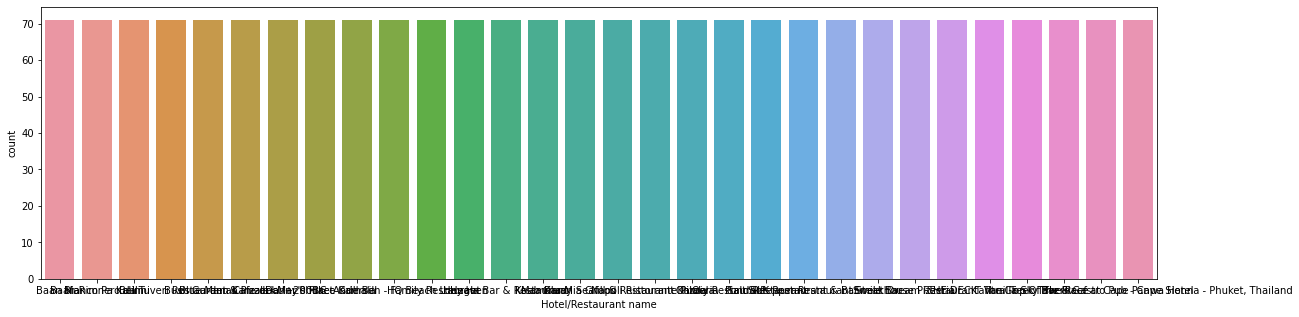

In [22]:
#dataset and text sampling with visualization
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=5)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train,y_train)
plt.figure(figsize=(20,5))
sns.countplot(x=y_train_undersampled)

In [23]:
#fitting model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_undersampled,y_train_undersampled)

MultinomialNB()

In [24]:
y_pred = model.predict(X_test)
#Computing the accuracy and making the confusion matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n' %(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('--------------------------------')
result = metrics.classification_report(y_test,y_pred)
print("Classification Report:\n",)
print(result)

accuracy:0.45


Confusion Matrix:
[[15  0  0  1  0  0  0  2  0  0  1  0  0  0  0  0  0  1  1  0  1  0  0  0
   0  0  0  0  1  1]
 [ 0 11  2  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  1  0  0  0
   1  0  1  0  1  0]
 [ 0  0 13  2  0  1  0  0  1  0  0  0  0  0  0  3  3  0  0  0  1  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  8  0  4  0  0  0  0  0  0  0  0  0  1  2  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  8  0  0  0  0  0  0  0  0  4  0  1  0  0  3  3  0  0  0  2
   0  0  0  2  0  0]
 [ 0  0  1  1  0  9  0  0  1  0  0  0  0  0  0  1  2  1  0  1  0  0  0  0
   0  0  1  0  0  0]
 [ 0  1  0  0  0  0  4  0  0  0  4  0  0  0  0  0  1  0  1  0  0  1  1  1
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 13  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0]
 [ 1  1  1  0  0  0  1  0 10  0  0  0  2  0  0  0  0  1  2  1  0  0  1  1
   0  0  0  0  0  0]
 [ 2  0  3  0  0  2  0  0  1  5  0  0  2  0  1  1  1  3  1  1  0  1  1  1
   0  0  1  0  1  0]
 [ 0  0  0  0  0

In [25]:
#Sentiment Analysis
#Reviews from 30 hotels in Kamala region of Thailand dataset and exploration
Kamr1 = pd.read_csv('Kamala_Tourist_Reviews.csv')
Kamr1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
1,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
2,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
3,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
4,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."


In [26]:
#extracting the values from the dictionary to create additional columns
Kamr1['compound']=[sentiment.polarity_scores(review)['compound'] for review in Kamr1['Review']]
Kamr1['neg']=[sentiment.polarity_scores(review)['neg'] for review in Kamr1['Review']]
Kamr1['neu']=[sentiment.polarity_scores(review)['neg'] for review in Kamr1['Review']]
Kamr1['pos']=[sentiment.polarity_scores(review)['pos'] for review in Kamr1['Review']]

In [27]:
Kamr1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...,0.9600,0.000,0.000,0.314
1,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...,0.9704,0.000,0.000,0.435
2,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...,0.9042,0.000,0.000,0.258
3,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...,0.1833,0.147,0.147,0.191
4,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but...",0.3031,0.000,0.000,0.130


In [28]:
#statistics of the negative, neutral and positive words
Kamr1[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2962.000000,2962.000000,2962.000000,2962.000000
mean,0.667749,0.027139,0.027139,0.239821
std,0.420654,0.050941,0.050941,0.134159
min,-0.959000,0.000000,0.000000,0.000000
25%,0.618700,0.000000,0.000000,0.141000
50%,0.846000,0.000000,0.000000,0.233000
75%,0.929525,0.043000,0.043000,0.328000
max,0.990400,0.427000,0.427000,0.756000


<AxesSubplot:xlabel='compound', ylabel='Count'>

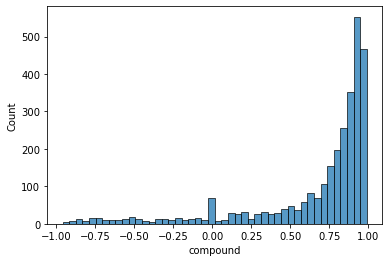

In [29]:
#PLOTING THE COMPOUND TOKENS
sns.histplot(Kamr1['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

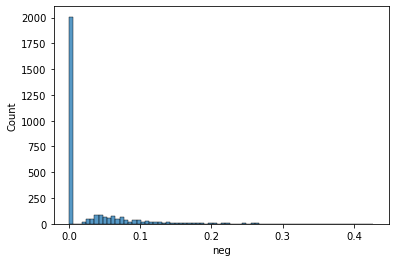

In [30]:
#PLOTING THE NEGATIVE TOKENS
sns.histplot(Kamr1['neg'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

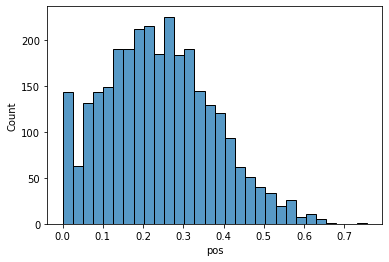

In [31]:
#PLOTING THE POSITIVE TOKENS
sns.histplot(Kamr1['pos'])

In [32]:
#exploration of the negative reviews for each hotel in the dataset 
(Kamr1['compound']<=0).groupby(Kamr1['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Baan Mai                                                          7
Baan Rim Pa Kalim                                                 4
Bellini                                                          14
Bianconero da Tuveri Restaurant & Pizzeria                        6
Blue Manao                                                       10
Bush Garden Kamala<U+200B>                                        5
Cafe del Mar Phuket                                              20
Danny's Place Kamala                                             12
Grill Bill                                                        5
H.C. Andersen - Family Restaurant                                16
HQ Beach Lounge                                                  12
Heaven                                                            3
Hey Ha Bar & Restaurant                                           6
Kaab Gluay                                                       15
Karon Seafood             

In [34]:
#calculates as percentage output of total negative reviews
percent_negative = pd.DataFrame((Kamr1['compound']<=0).groupby(Kamr1['Hotel/Restaurant name']).sum()
                            /Kamr1['Hotel/Restaurant name'].groupby(Kamr1['Hotel/Restaurant name']).count()*100,
                  columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel/Restaurant name,
Sweet Dream Restaurant,2.000000
Heaven,3.157895
Baan Rim Pa Kalim,4.000000
"Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand",4.040404
Grill Bill,5.000000
Bush Garden Kamala<U+200B>,5.050505
Bianconero da Tuveri Restaurant & Pizzeria,6.122449
Hey Ha Bar & Restaurant,6.315789
Baan Mai,7.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

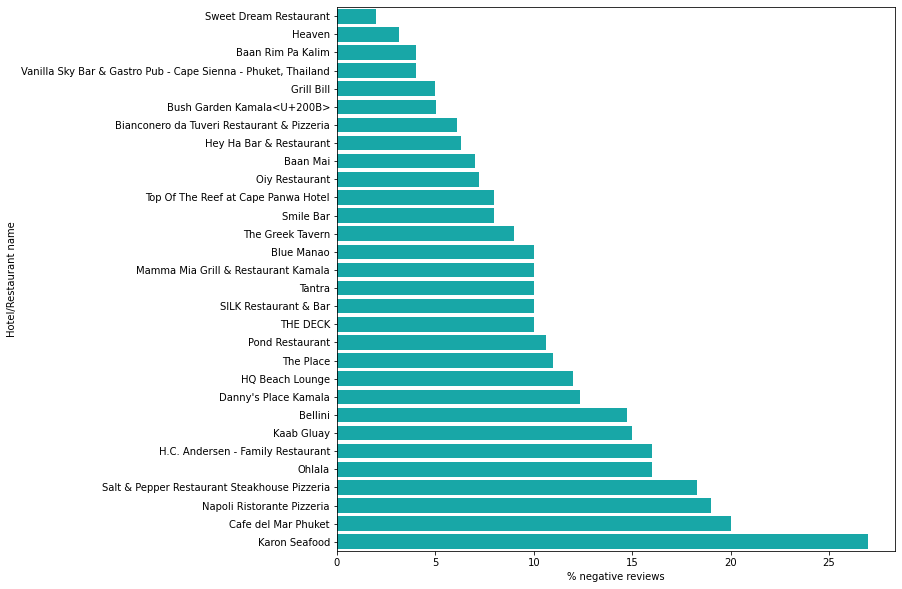

In [35]:
#visualizing the negative reviews using barplot 
plt.figure(figsize=(10,10))
sns.barplot(data=percent_negative, x = '% negative reviews',y=percent_negative.index,color='c')

In [36]:
#using corpus to check stopwords from tokenized text available
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
#Creating a function to apply all of the data preprocessing steps which can then used on a corpus
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)#Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]#Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]#Stemming
  return stemmed_text

In [39]:
#process the text data ready for wordcloud visualization, using the function we defined earlier
#for this part of the exercise we will focus specifically on OSOT Hotel, as it has lowest value of negative review

Kamr1['processed_review'] = Kamr1['Review'].apply(preprocess_text)

reviews_positive_subset = Kamr1.loc[(Kamr1['Hotel/Restaurant name']=='Sweet Dream Restaurant') 
                                       & (Kamr1['compound']>0),:]

reviews_negative_subset = Kamr1.loc[(Kamr1['Hotel/Restaurant name']=='Sweet Dream Restaurant')
                                      & (Kamr1['compound']<=0),:]
reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
1688,rn577557438,Reviewed 2 weeks ago,Kamala,Sweet Dream Restaurant,The food here is the best Thai food we found i...,0.8834,0.000,0.000,0.292,"[food, best, thai, food, found, kamala, beach,..."
1689,rn570942993,"Reviewed April 4, 2018",Kamala,Sweet Dream Restaurant,"As others already pointed out: average, pretty...",0.7684,0.082,0.082,0.242,"[other, alreadi, point, averag, pretti, averag..."
1690,rn569834669,"Reviewed March 31, 2018",Kamala,Sweet Dream Restaurant,"The ambience of the restaurant is nice, the se...",0.8374,0.000,0.000,0.235,"[ambienc, restaur, nice, servic, rather, slow,..."
1691,rn568569944,"Reviewed March 24, 2018",Kamala,Sweet Dream Restaurant,Disappointed by this place we tried to change ...,0.8100,0.040,0.040,0.183,"[disappoint, place, tri, chang, favorit, place..."
1692,rn568553833,"Reviewed March 24, 2018",Kamala,Sweet Dream Restaurant,"We chose this place on a whim, and were pleasa...",0.6124,0.000,0.000,0.111,"[chose, place, whim, pleasantli, surpris, expe..."


In [40]:
reviews_negative_subset['processed_review']

1705    [food, bland, bitterli, disappoint, order, tha...
1769    [stick, thai, food, best, say, neither, worst,...
Name: processed_review, dtype: object

['food', 'bland', 'bitterli', 'disappoint', 'order', 'thai', 'food', 'mayb', 'western', 'food', "that'", 'good', "we'r", 'thailand', 'thought', 'poor', 'valu', 'money', 'given', 'small', 'portion', 'size', 'flavorless', 'food', 'green', 'curri', 'pad', 'thai', 'children', 'stick', 'thai', 'food', 'best', 'say', 'neither', 'worst', 'say', 'tin', 'realli', 'thai', 'food', 'usual', 'choic', 'local', 'dish', 'bad', 'tast', 'bad', 'valu', 'money', 'staff']


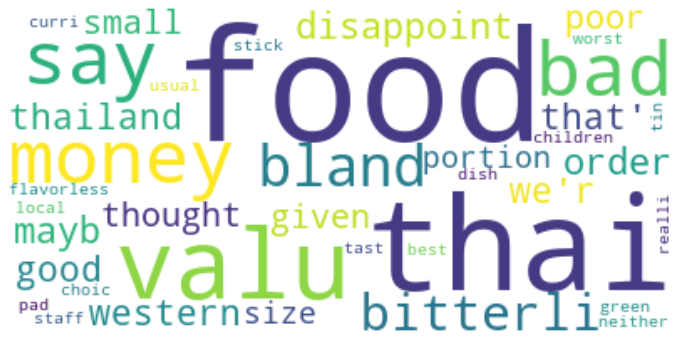

In [44]:
#wordcloud of words from negative reviews by a hotel


neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

print(neg_tokens)
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

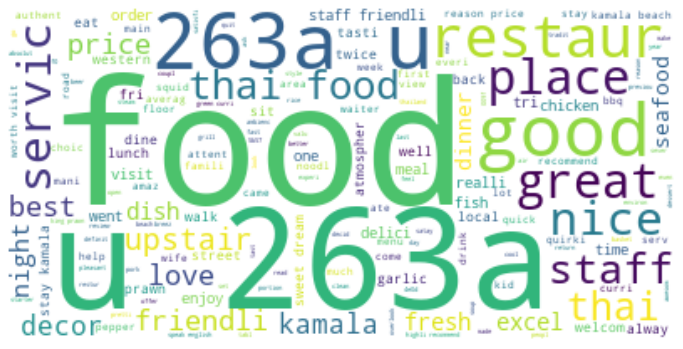

In [43]:
#wordcloud of words from postive reviews by a hotel
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

#display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
#using the tabular method to understand the most frequent positive words,and the number of occurrences of each.
#use the nltk Freqdist and then tabulate
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

      u    food    263a    good restaur    thai   staff   great   place  kamala 
    103      85      64      51      48      41      35      33      32      30 


In [46]:
#using the tabular method to understand the most frequent negative words,and the number of occurrences of each.
#use the nltk Freqdist and then tabulate
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

      food       thai       valu      money        say        bad      bland   bitterli disappoint      order 
         6          4          2          2          2          2          1          1          1          1 


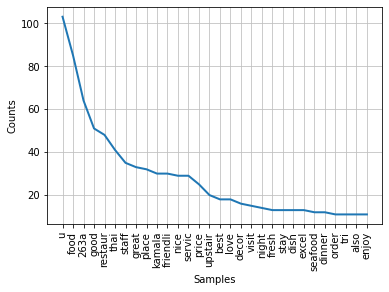

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
#Using plot method to create a frequency distribution plot for the most frequent words in the positive reviews
pos_freqdist.plot(30)

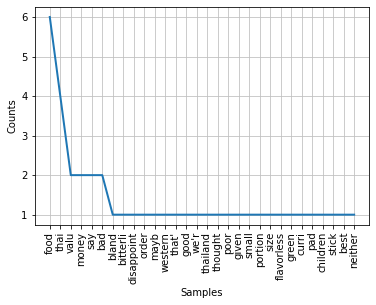

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [48]:
#Using plot method to create a frequency distribution plot for the most frequent words in the negative reviews
neg_freqdist.plot(30)